# Data input


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Colab Notebooks/Kaggle"

In [ ]:
pwd

'/content'

In [ ]:
import numpy as np
import pandas as pd 

# visulaize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# preprocess
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from keras.preprocessing.text import text_to_word_sequence

# exploration
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

# models
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
!kaggle competitions download -c learn-ai-bbc

learn-ai-bbc.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

'BBC News Sample Solution.csv'	 gdrive		    sample_data
'BBC News Test.csv'		 learn-ai-bbc.zip
'BBC News Train.csv'		 out.png


In [ ]:
#!unzip learn-ai-bbc.zip

Archive:  learn-ai-bbc.zip
replace BBC News Sample Solution.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace BBC News Test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace BBC News Train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!ls

'BBC News Sample Solution.csv'	 gdrive		    sample_data
'BBC News Test.csv'		 learn-ai-bbc.zip
'BBC News Train.csv'		 out.png


In [ ]:
sample = pd.read_csv('BBC News Sample Solution.csv')
train = pd.read_csv('BBC News Train.csv')
test = pd.read_csv('BBC News Test.csv')

In [ ]:
train

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


# Data Preprocessing

In [ ]:
# Analyze train dataframe further

print("No. of records -",train.shape[0])
print("No. of features -",train.shape[1])
print("Features -",train.columns.values)

No. of records - 1490
No. of features - 3
Features - ['ArticleId' 'Text' 'Category']


In [ ]:
# records per category

train['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [ ]:
train.isna().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [ ]:
target_category = train['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


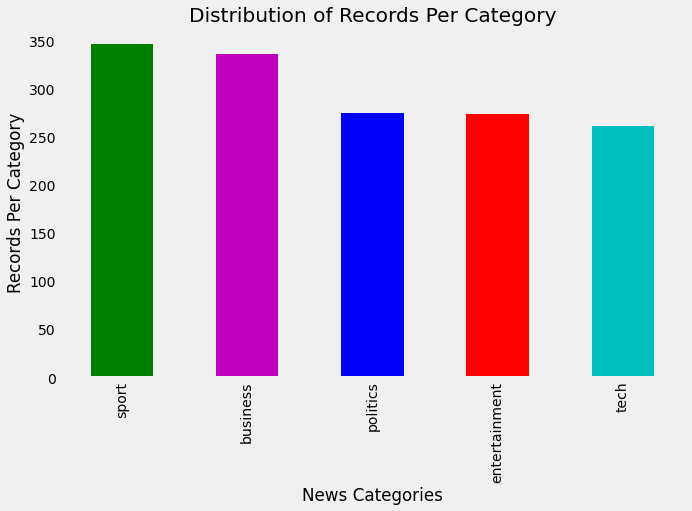

In [ ]:
news_category = train['Category'].value_counts()

plt.figure(figsize=(10,6))
colors = ['g','m','b','r','c']
news_category.plot(kind='bar', color=colors)
plt.grid()
plt.xlabel("News Categories")
plt.ylabel("Records Per Category")
plt.title("Distribution of Records Per Category")
plt.show()

In [ ]:
train['length'] = train['Text'].apply(len)

(array([919., 482.,  76.,   6.,   3.,   1.,   0.,   2.,   0.,   1.]),
 array([  501. ,  2289.6,  4078.2,  5866.8,  7655.4,  9444. , 11232.6,
        13021.2, 14809.8, 16598.4, 18387. ]),
 <a list of 10 Patch objects>)

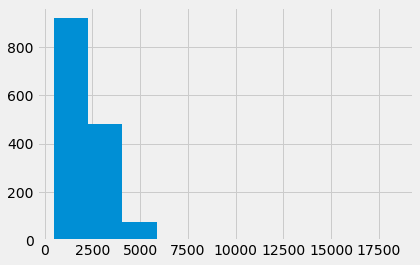

In [ ]:
plt.hist(x=train['length'])

In [ ]:
# adding category id to the data frame depending on the category of the article

train['category_id'] = train['Category'].factorize()[0]
category_id_train = train[['Category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_train.values)
id_to_category = dict(category_id_train[['category_id', 'Category']].values)
train

,ArticleId,Text,Category,length,category_id
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,0
1,154,german business confidence slides german busin...,business,2016,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,0
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,1
4,917,enron bosses in $168m payout eighteen former e...,business,2190,0
...,...,...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment,1266,4
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment,3111,4
1487,1590,weak dollar hits reuters revenues at media gro...,business,1370,0
1488,1587,apple ipod family expands market apple has exp...,tech,3242,1


In [ ]:
def preprocess_data(text):
    text = text.lower().replace('\n', ' ').replace('\r', '').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)

    train_text= str(text)
    tokenized_train_set = text_to_word_sequence(train_text,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=" ")
        
    stop_words = set(stopwords.words('english'))
    stopwordremove = [i for i in tokenized_train_set if not i in stop_words]
        
    stemmer= PorterStemmer()
    stem_text=' '.join([stemmer.stem(word) for word in stopwordremove])    
        
    lemmatizer = WordNetLemmatizer()

    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    lem_input = nltk.word_tokenize(stem_text)
    lem_text= ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in lem_input])
    return lem_text

In [ ]:
train['Text'] = train['Text'].apply(preprocess_data)
train['New Length'] = train['Text'].str.len()
train.head()

,ArticleId,Text,Category,length,category_id,New Length
0,1833,worldcom exboss launch defenc lawyer defend fo...,business,1866,0,1216
1,154,german busi confid slide german busi confid fe...,business,2016,0,1302
2,1101,bbc poll indic econom gloom citizen major nati...,business,3104,0,1835
3,1976,lifestyl govern mobil choic faster well funkie...,tech,3618,1,2115
4,917,enron bos 168m payout eighteen former enron di...,business,2190,0,1368


# Data Exploration

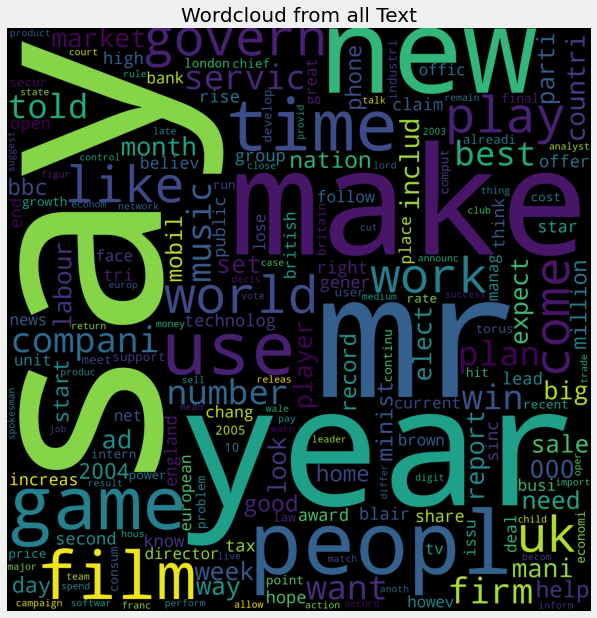

In [ ]:
# plotting the word cloud for the entire data

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train['Text'])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'black', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Wordcloud from all Text", fontsize = 20)
plt.show()

In [ ]:
# plotting the word cloud for the data per category

def get_word_cloud(category):
    cat_df = train[train.Category == category]
    cat_words = cat_df[['Text']].values[0].tolist()
    cat_words =  ''.join(cat_words)
    return  WordCloud(background_color="black",max_font_size=40).generate(cat_words)

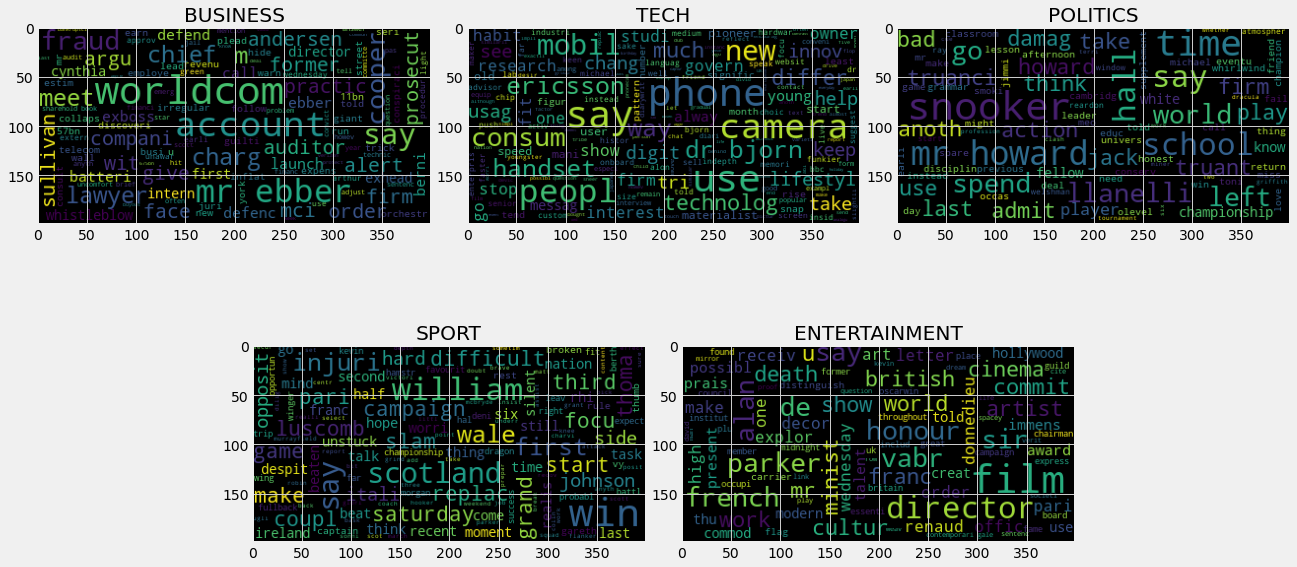

In [ ]:
word_clouds = [get_word_cloud(category) for category in target_category]

# grid for 5 category
plt.figure(figsize=(20,10))

axs = [ plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2),
        plt.subplot2grid((2,6), (0,2), colspan=2),
        plt.subplot2grid((2,6), (0,4), colspan=2),
        plt.subplot2grid((2,6), (1,1), colspan=2),
        plt.subplot2grid((2,6), (1,3), colspan=2)]

for i in range(5):
    axs[i].imshow(word_clouds[i])
    axs[i].set_title(target_category[i].upper())
plt.show()

In [ ]:
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
train

,ArticleId,Text,Category,length,category_id,New Length
0,1833,worldcom exboss launch defenc lawyer defend fo...,business,1866,0,1216
1,154,german busi confid slide german busi confid fe...,business,2016,0,1302
2,1101,bbc poll indic econom gloom citizen major nati...,business,3104,0,1835
3,1976,lifestyl govern mobil choic faster well funkie...,tech,3618,1,2115
4,917,enron bos 168m payout eighteen former enron di...,business,2190,0,1368
...,...,...,...,...,...,...
1485,857,doubl evict big brother model capric holbi cit...,entertainment,1266,4,777
1486,325,dj doubl act revamp chart show dj duo jk joel ...,entertainment,3111,4,1856
1487,1590,weak dollar hit reuter revenu medium group reu...,business,1370,0,870
1488,1587,appl ipod famili expand market appl expand ipo...,tech,3242,1,2000


In [ ]:
# calculating tfidf

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(train.Text).toarray()
labels = train.category_id
features.shape

(1490, 8691)

In [ ]:
category_to_id.items()

dict_items([('business', 0), ('tech', 1), ('politics', 2), ('sport', 3), ('entertainment', 4)])

In [ ]:
# https://machinelearningmastery.com/how-to-fix-futurewarning-messages-in-scikit-learn/

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
i = 0
N = 3
print("Most correlated unigrams and bigrams :")
for category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("{} - '{}':".format(i, category))
  print("  *unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  *bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))
  i += 1

Most correlated unigrams and bigrams :
0 - 'business':
  *unigrams:
       . growth
       . profit
       . bank
  *bigrams:
       . stock market
       . econom growth
       . analyst say
1 - 'entertainment':
  *unigrams:
       . actor
       . star
       . film
  *bigrams:
       . lo angel
       . film festiv
       . box offic
2 - 'politics':
  *unigrams:
       . torus
       . elect
       . labour
  *bigrams:
       . lib dem
       . toni blair
       . mr blair
3 - 'sport':
  *unigrams:
       . coach
       . cup
       . champion
  *bigrams:
       . champion leagu
       . grand slam
       . australian open
4 - 'tech':
  *unigrams:
       . comput
       . softwar
       . user
  *bigrams:
       . peopl use
       . let peopl
       . mobil phone


In [ ]:
# applying dimensionality reduction technique to reduce noise
# sampling a subset of dataset because t-SNE is computationally expensive

sample_size = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=sample_size, replace=False)
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])

<Figure size 1440x1080 with 0 Axes>

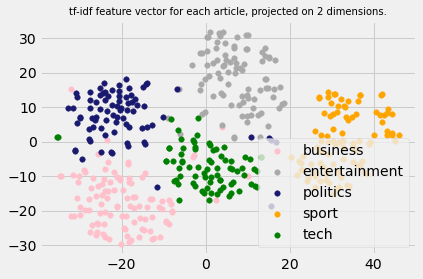

<Figure size 1440x1080 with 0 Axes>

In [ ]:
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']
for Category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=Category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=10))
plt.legend()
plt.figure(figsize=(20, 15))

# Model training

In [ ]:
text = train['Text']
category = train['Category']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(text,category, test_size = 0.3, random_state = 60,shuffle=True, stratify=category)

print(len(X_train))
print(len(X_test))

1043
447


In [ ]:
# naive bayes

model = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB()),])
model.fit(X_train,Y_train)

test_predict = model.predict(X_test)

train_accuracy = round(model.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)
dataTrain = {'naive bayes': train_accuracy}
dataTest = {'naive bayes': test_accuracy}

print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy ))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=target_category))

Naive Bayes Train Accuracy Score : 99% 
Naive Bayes Test Accuracy Score  : 96% 

               precision    recall  f1-score   support

     business       0.97      0.95      0.96       103
         tech       0.93      1.00      0.96        76
     politics       0.94      0.93      0.93        83
        sport       1.00      0.98      0.99       106
entertainment       0.96      0.95      0.96        79

     accuracy                           0.96       447
    macro avg       0.96      0.96      0.96       447
 weighted avg       0.96      0.96      0.96       447



In [ ]:
# decision tree

model = Pipeline([('tfidf', TfidfVectorizer()),('dt', DecisionTreeClassifier()),])

model.fit(X_train, Y_train)
test_predict = model.predict(X_test)

train_accuracy = round(model.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)
dataTrain['decision tree'] = train_accuracy
dataTest['decision tree'] = test_accuracy

print("Decision Tree Train Accuracy Score : {}% ".format(train_accuracy ))
print("Decision Tree Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=target_category))

Decision Tree Train Accuracy Score : 100% 
Decision Tree Test Accuracy Score  : 81% 

               precision    recall  f1-score   support

     business       0.80      0.74      0.77       109
         tech       0.72      0.82      0.77        72
     politics       0.71      0.82      0.76        71
        sport       0.95      0.81      0.88       122
entertainment       0.81      0.86      0.83        73

     accuracy                           0.81       447
    macro avg       0.80      0.81      0.80       447
 weighted avg       0.82      0.81      0.81       447



In [ ]:
# random forest

model = Pipeline([('tfidf', TfidfVectorizer()),('rfc', RandomForestClassifier(n_estimators=100)),])

model.fit(X_train, Y_train)

test_predict = model.predict(X_test)

train_accuracy = round(model.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)
dataTrain['random forest'] = train_accuracy
dataTest['random forest'] = test_accuracy

print("Train Accuracy Score : {}% ".format(train_accuracy ))
print("Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=target_category))

Train Accuracy Score : 100% 
Test Accuracy Score  : 96% 

               precision    recall  f1-score   support

     business       0.98      0.93      0.96       106
         tech       0.90      1.00      0.95        74
     politics       0.95      0.94      0.95        83
        sport       1.00      0.95      0.98       109
entertainment       0.92      0.96      0.94        75

     accuracy                           0.96       447
    macro avg       0.95      0.96      0.95       447
 weighted avg       0.96      0.96      0.96       447



[(70.0, 100.0)]

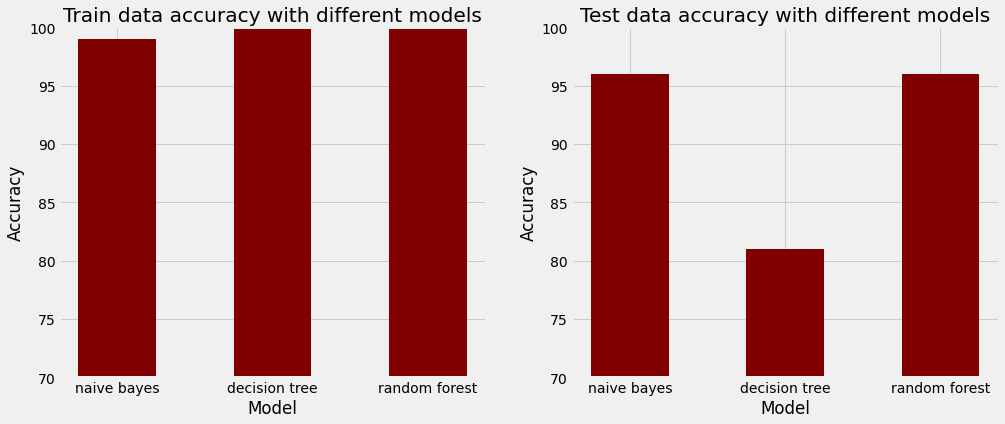

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(hspace=0.5)
ax = plt.subplot(1, 2, 1)

model = list(dataTrain.keys())
acc = list(dataTrain.values())
ax.bar(model, acc, color ='maroon', width = 0.5)
ax.set_xlabel("Model")
ax.set_ylabel("Accuracy")
ax.title.set_text("Train data accuracy with different models")
ax.set(ylim=[70, 100])

model = list(dataTest.keys())
acc = list(dataTest.values())
ax = plt.subplot(1, 2, 2) 
ax.bar(model, acc, color ='maroon', width = 0.5)

ax.set_xlabel("Model")
ax.set_ylabel("Accuracy")
ax.title.set_text("Test data accuracy with different models")
ax.set(ylim=[70, 100])

In [ ]:
# analyzing further using naive bayes

model = MultinomialNB()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, train.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

Text(0.5, -1.340000000000014, 'Predicted')

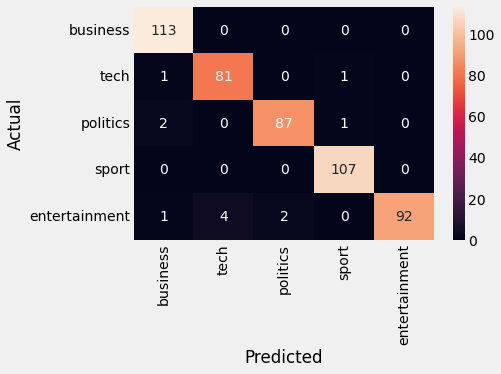

In [ ]:
confusionMatrix = confusion_matrix(y_test, y_pred)
snsplot = sns.heatmap(confusionMatrix, annot=True, fmt='d',
            xticklabels=category_id_train.Category.values, yticklabels=category_id_train.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')